# 04_offline_tf_cnn_lstm_notebook.ipynb
Offline Training and Evaluation of CNN+LSTM TensorFlow Model
This notebook trains a CNN+LSTM model on 5G throughput data, visualizes loss curves, computes metrics, and displays a Run 14 heatmap.

In [13]:
%pip install tensorflow.compat

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.compat (from versions: none)
ERROR: No matching distribution found for tensorflow.compat


## 1. Imports and Configuration

In [1]:

# Upgrade numpy and related libraries to avoid binary incompatibility issues
%pip install --upgrade --force-reinstall numpy pandas scikit-learn matplotlib joblib tensorflow folium

# IMPORTANT: Restart the kernel after running the above lines to avoid ImportError.
# After restarting, re-run this cell (without the %pip lines) and continue with your workflow.

import os
import numpy as np
import pandas as pd
import joblib
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Create directories
os.makedirs("models", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit-folium 0.14.0 requires streamlit>=1.13.0, which is not installed.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 5.29.4 which is incompatible.
googleapis-common-protos 1.62.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 5.29.4 which is incompatible.
mlflow 2.11.3 requires importlib-metadata!=4.7.0,<8,>=3.7.0, but you have importlib-metadata 8.7.0 which is incompatible.
mlflow 2.11.3 requires numpy<2, but you have numpy 2.0.2 which is incompatible.
mlflow 2.11.3 requires packaging<24, but you have packaging 25.0 which is incompatible.
mlflow 2.11.3 requires protobuf<5,>=3.12.0, but you have protobuf 5.29.4 which is incom

  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl.metadata (15 kB)
  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached tensorflow-2.19.0-cp39-cp39-win_amd64.whl.metadata (4.1 kB)
  Using cached folium-0.19.6-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached font


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Souhaeil\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Souhaeil\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Souhaeil\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Souhaeil\AppData\Roaming\Python\Python39\site-packages\traitlets\config\ap

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Souhaeil\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Souhaeil\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Souhaeil\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Souhaeil\AppData\Roaming\Python\Python39\site-packages\traitlets\config\ap

AttributeError: _ARRAY_API not found

ImportError: Traceback (most recent call last):
  File "c:\Users\Souhaeil\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

## 2. Load and Preprocess Data

In [5]:
# Load dataset
path = r"D:\SEMESTER 2\PI\5G_throughput_prediction\data\mm-5G-enriched.csv"
df = pd.read_csv(path)
df.drop(columns=["debit_class"], inplace=True, errors="ignore")

# Rolling window parameters
SEQ_LEN = 10
targets = ["debit_brut", "debit_lisse"]
features = df.select_dtypes(include=[np.number]).columns.drop(targets).tolist()

# Build sequences
X, y_raw, y_smooth, runs = [], [], [], []
for run_id, grp in df.groupby("run_num"):
    grp = grp.reset_index(drop=True)
    for i in range(len(grp) - SEQ_LEN):
        X.append(grp.loc[i : i + SEQ_LEN - 1, features].values)
        y_raw.append(grp.loc[i + SEQ_LEN, "debit_brut"])
        y_smooth.append(grp.loc[i + SEQ_LEN, "debit_lisse"])
        runs.append(run_id)

X = np.stack(X)
y_raw = np.array(y_raw)
y_smooth = np.array(y_smooth)
runs = np.array(runs)

# Scale features
ns, _, nf = X.shape
scaler = MinMaxScaler()
X_flat = scaler.fit_transform(X.reshape(-1, nf))
X = X_flat.reshape(ns, SEQ_LEN, nf)

# Save scaler
joblib.dump(scaler, "models/scaler.gz")

# Train/validation split
(
    X_train,
    X_val,
    y_raw_train,
    y_raw_val,
    y_smooth_train,
    y_smooth_val,
    runs_train,
    runs_val,
) = train_test_split(
    X, y_raw, y_smooth, runs, test_size=0.2, random_state=42, shuffle=False
)

NameError: name 'MinMaxScaler' is not defined

## 3. Build and Compile Model

In [8]:
input_layer = layers.Input(shape=(SEQ_LEN, nf))
x = layers.Conv1D(32, 3, padding="same", activation="relu")(input_layer)
x = layers.Conv1D(64, 3, padding="same", activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.LSTM(64)(x)
raw_output = layers.Dense(1, name="raw")(x)
smooth_output = layers.Dense(1, name="smooth")(x)
model = models.Model(inputs=input_layer, outputs=[raw_output, smooth_output])
model.compile(optimizer="adam", loss="mse")

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 25)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 10, 32)       2432        ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 10, 64)       6208        ['conv1d[0][0]']                 
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 5, 64)        0           ['conv1d_1[0][0]']               
                                                                                              

## 4. Train with Early Stopping

In [1]:
es = callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
history = model.fit(
    X_train,
    [y_raw_train, y_smooth_train],
    validation_data=(X_val, [y_raw_val, y_smooth_val]),
    epochs=100,
    batch_size=32,
    callbacks=[es],
)

# Save model
model.save("models/throughput_model.keras")

NameError: name 'callbacks' is not defined

## 5. Loss Curves Visualization

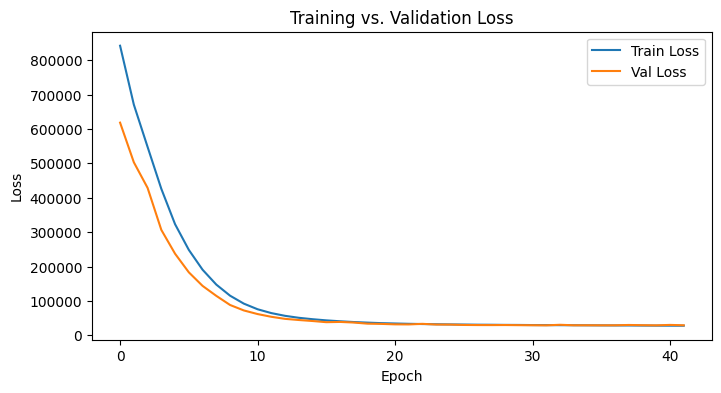

In [10]:
# Plot training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Training vs. Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 6. Evaluation Metrics

In [ ]:
# Predictions on validation
pred_raw, pred_smooth = model.predict(X_val)
pred_raw = pred_raw.squeeze()
pred_smooth = pred_smooth.squeeze()

# Switch: choose prediction closest to true raw
pred_final = np.where(
    np.abs(pred_raw - y_raw_val) < np.abs(pred_smooth - y_raw_val),
    pred_raw,
    pred_smooth,
)

# Compute metrics
rmse_raw = np.sqrt(mean_squared_error(y_raw_val, pred_raw))
rmse_smooth = np.sqrt(mean_squared_error(y_smooth_val, pred_smooth))
rmse_final = np.sqrt(mean_squared_error(y_raw_val, pred_final))
mae_final = mean_absolute_error(y_raw_val, pred_final)
r2_final = r2_score(y_raw_val, pred_final)

# Display metrics
metrics = pd.DataFrame(
    {
        "Metric": ["RMSE Raw", "RMSE Smooth", "RMSE Final", "MAE Final", "R2 Final"],
        "Value": [rmse_raw, rmse_smooth, rmse_final, mae_final, r2_final],
    }
)
metrics

419/419 [==============================] - 1s 1ms/step


,Metric,Value
0,RMSE Raw,164.438836
1,RMSE Smooth,45.636756
2,RMSE Final,145.436065
3,MAE Final,82.321365
4,R2 Final,0.897899


## 7. Run 14 Heatmap via Folium

In [12]:
# Improved Run Heatmap with Colormap and Circle Markers

import folium
import branca.colormap as cm
from IPython.display import IFrame

# Select a valid run (same logic as before)
valid_runs = np.unique(runs_val)
run_to_plot = 14 if 14 in valid_runs else valid_runs[0]
run_idx = np.where(runs_val == run_to_plot)[0][:20]
coords_df = df[df.run_num == run_to_plot].reset_index(drop=True)
coords = coords_df.loc[run_idx + SEQ_LEN, ["latitude", "longitude"]].values.tolist()
preds = pred_final[run_idx].tolist()

# Determine map center and bounds
lats, lons = zip(*coords)
center = [np.mean(lats), np.mean(lons)]

# Create map with a nicer tile
m = folium.Map(location=center, zoom_start=14, tiles="CartoDB positron")

# Create and add a linear colormap
vmin, vmax = min(preds), max(preds)
colormap = cm.LinearColormap(
    ["blue", "green", "yellow", "red"],
    vmin=vmin,
    vmax=vmax,
    caption="Predicted Throughput (Mbps)",
)
colormap.add_to(m)

# Add circle markers sized and colored by throughput
for (lat, lon), val in zip(coords, preds):
    color = colormap(val)
    folium.CircleMarker(
        location=[lat, lon],
        radius=8,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
        popup=folium.Popup(f"<b>{val:.2f} Mbps</b>", parse_html=True),
    ).add_to(m)

# Fit map to all points
m.fit_bounds([[min(lats), min(lons)], [max(lats), max(lons)]])

# Save and display
html_path = "outputs/run_heatmap_improved.html"
m.save(html_path)
print(f"Improved heatmap saved to {html_path}")

IFrame(html_path, width=800, height=600)

Improved heatmap saved to outputs/run_heatmap_improved.html
